In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-complete-stocks-dataset/TSLA_2019-01-30_2025-04-17.csv
/kaggle/input/tesla-complete-stocks-dataset/TSLA_2019-01-30_2025-07-14.csv
/kaggle/input/tesla-complete-stocks-dataset/TSLA_2019-01-30_2025-05-12.csv
/kaggle/input/tesla-complete-stocks-dataset/TSLA_2019-01-30_2025-04-06.csv


In [2]:
import warnings
warnings.filterwarnings("ignore") #suppress warnings in outputs

# EDA

In [10]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

#data = pd.read_csv("../input/s-and-p-500-spy/spy.csv")
data = pd.read_csv("../input/tesla-complete-stocks-dataset/TSLA_2019-01-30_2025-07-14.csv") #up to 14/Jul/25
#exclude the 1st redundant row in TSLA
data = data[1:]

print(f"The shape of the data is: {data.shape}\n")
print(data.columns)
print(f"\n {data.dtypes} \n")
print(f"{data.head(3)} \n")
data.tail(3)

The shape of the data is: (1621, 7)

Index(['date', 'open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

 date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object 

         date                open                high                 low  \
1  2019-01-30  20.030000686645508  20.600000381469727   19.89933204650879   
2  2019-01-31  20.066667556762695  20.770666122436523  19.600000381469727   
3  2019-02-01    20.3613338470459  21.073333740234375  20.233333587646484   

                close           adj_close     volume  
1  20.584667205810547  20.584667205810547  168754500  
2  20.468000411987305  20.468000411987305  188538000  
3   20.81399917602539   20.81399917602539  109251000   



,date,open,high,low,close,adj_close,volume
1619,2025-07-09,297.54998779296875,300.1499938964844,293.54998779296875,295.8800048828125,295.8800048828125,75586800
1620,2025-07-10,300.04998779296875,310.4800109863281,300.0,309.8699951171875,309.8699951171875,104365300
1621,2025-07-11,307.8900146484375,314.0899963378906,305.6499938964844,313.510009765625,313.510009765625,78921900


In [11]:
#null/nan check 
print(f"check any null: {data.isnull().any().any()}")
print(f"check any NaN: {data.isna().any().any()}")

check any null: False
check any NaN: False


## TSLA

In [16]:
#numeric cols are all non-numerics
for col in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
    non_numeric = data[col][~data[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Total number of non-numeric values in {col}: {len(non_numeric)}")

Total number of non-numeric values in open: 1621
Total number of non-numeric values in high: 1621
Total number of non-numeric values in low: 1621
Total number of non-numeric values in close: 1621
Total number of non-numeric values in adj_close: 1621
Total number of non-numeric values in volume: 1621


In [20]:
#log the numerical columns: OHLC, adj_close, vol
#turn original str to float fist
num_cols = ['open', 'high', 'low', 'close', 'adj_close', 'volume']
data[num_cols] = data[num_cols].apply(pd.to_numeric).apply(np.log)
data.head(3)

,date,open,high,low,close,adj_close,volume
1,2019-01-30,2.997231,3.025291,2.990686,3.024546,3.024546,18.943956
2,2019-01-31,2.999060,3.033542,2.975530,3.018863,3.018863,19.054810
3,2019-02-01,3.013638,3.048008,3.007331,3.035626,3.035626,18.509159


In [21]:
#null/nan check 
print(f"check any null: {data.isnull().any().any()}")
print(f"check any NaN: {data.isna().any().any()}")

check any null: False
check any NaN: False


In [24]:
data.describe()

,open,high,low,close,adj_close,volume
count,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000,1621.000000
mean,4.945473,4.968008,4.921445,4.945682,4.945682,18.517814
std,0.993279,0.993915,0.991665,0.992571,0.992571,0.494865
min,2.490999,2.521346,2.468043,2.479168,2.479168,17.196566
25%,4.804758,4.835885,4.785406,4.813971,4.813971,18.179340
50%,5.371103,5.390441,5.344485,5.370095,5.370095,18.459242
75%,5.562987,5.587548,5.546466,5.567466,5.567466,18.802447
max,6.165208,6.191421,6.125799,6.173494,6.173494,20.633431


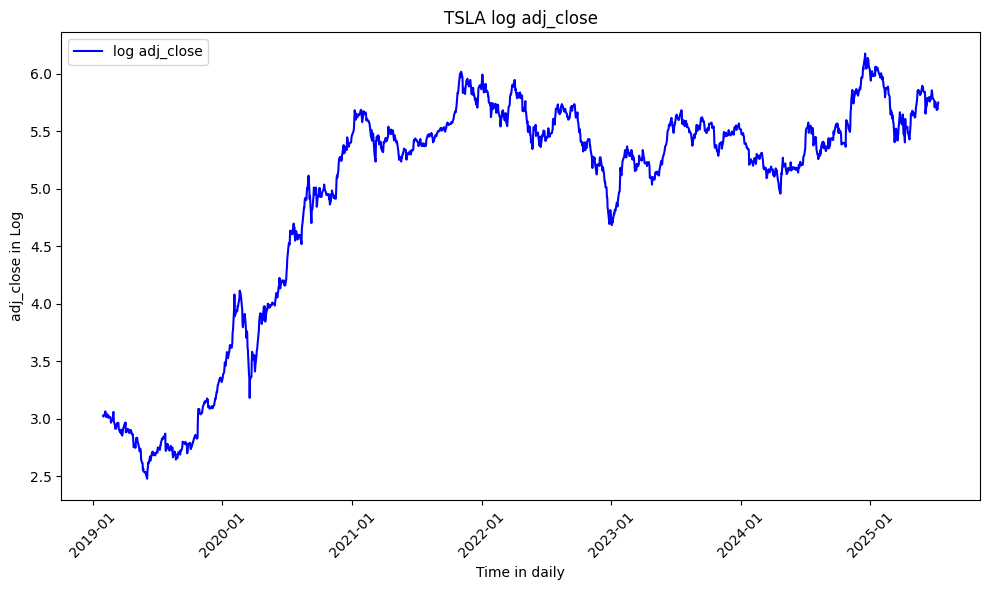

In [32]:
#from matplotlib.dates import DateFormatter, QuarterLocator
#plot the "adj_close" with time
# Convert 'time' column from string to datetime

#data['date'] = pd.to_datetime(data['date'])

# Create the plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data['date'], data['adj_close'], linestyle='-', color='b', label='log adj_close') #kwarg "marker='o'" will add data points on the line

# Set x-axis to show quarterly frequency
ax = plt.gca()  # Get current axis
#ax.xaxis.set_major_locator(QuarterLocator())  # Quarterly intervals
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))  # Format as YYYY-MM

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Time in daily')
plt.ylabel('adj_close in Log')
plt.title('TSLA log adj_close')
plt.legend()

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#only pick the "date", "adj_close" for model building/testing
data_adj = data[["date", "adj_close"]]

#use the log difference to represent 1-d return as a new column "adj_r"
data_adj["adj_r"] = data_adj["adj_close"].diff()

#use cluster method for z-scores
# Define cluster size
cluster_size = 20

# Add "cluster" col
df['cluster'] = df.index // cluster_size

# Compute mean and std for each cluster
cluster_stats = df.groupby('cluster')['adj_r'].agg(['mean', 'std']).shift(1)  # Shift to move i-1 cluster's stats for the i cluster

# Initialise "z_score" column
df['z_score'] = np.nan

# Compute Z-scores using previous cluster's mean and std
for cluster_id, group in df.groupby('cluster'):
    if cluster_id > 0:  # Skip first cluster
        mean_prev = cluster_stats.loc[cluster_id, 'mean']
        std_prev = cluster_stats.loc[cluster_id, 'std']
        if not np.isnan(std_prev) and std_prev != 0:
            df.loc[group.index, 'z_score'] = (group['price_diff'] - mean_prev) / std_prev
        else:
            df.loc[group.index, 'z_score'] = 0  # Handle zero std or NaN

# Optional: Handle NaN values
# df['z_score'] = df['z_score'].fillna(0)

#check any 0 and NaN in the result "z_score" col
z_nans = df['z_score'].isna().sum() #shouldn't be > cluster size number of "NaN"
z_zeros = (df['z_score'] == 0).sum()
print(f"Total number of NaN values in z_score: {z_nans}")
print(f"Total number of zeros in z_score: {z_zeros}")

In [ ]:
#import pandas as pd
import polars as pl #replace the pd for performance
import numpy as np
import math
import inspect
import random
import psutil
import logging
import gc
from collections import namedtuple, deque
from typing import Tuple, Optional
from dataclasses import dataclass, asdict

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from pytorch_forecasting.models.nn import MultiEmbedding
"""
input data is in dataframe = {
    "timedate" : [],
    "raw_price" : [],
    "log_daily_return" : [],
    "feature_n" : [], 
    "..." : [],
}

! for multi assets, the input data is expected to be in >=3D, so the corresponding function should be adjusted for taking the >=3D dataset. 
"""
def col2idx(dataframe):
        #save the column names for future column selection use after the data is converted into tensor
        column_names = dataframe.columns.tolist()
        col2idx = {name: i for i, name in enumerate(column_names)}
    return col2idx

class DataSampler(Dataset):
    """Dataset that generates random sequences for MDP training"""
    def __init__(self, dataframe, sample_length: int, epoch_size: int=10000):
        self.dataframe = dataframe
        self.sample_length = sample_length #input_len + holding_len, default assumption input_len = holding_len
        self.epoch_size=epoch_size
        self.max_start_idx = len(dataframe) - sample_length
    
    def __len__(self):
        return max(self.epoch_size, self.max_start_idx)
    
    def __getitem__(self, idx): #to enable the `[]` accessor
        start_idx = random.randint(0, self.max_start_idx) #has overlapping effects
        end_idx = start_idx + self.sample_length
        sample_sequence = self.dataframe.iloc[start_idx:end_idx].values #2D
        #keep an independant dataframe result by `.copy()`, otherwise use `.values` to get np.ndarray

        return torch.FloatTensor(sample_sequence) 

    def get_batch(self, batch_size): #the `batch_size` is expected to be <= `len(training_set)`
        """Get a single batch of samples"""
        batch_samples = []
        for _ in range(batch_size):
            # Get random sample (idx parameter is ignored because of `__getitem__`)
            sample = self[0]  # idx doesn't matter
            batch_samples.append(sample)
        return torch.stack(batch_samples, dim=0)
    
    def batch_generator(self, batch_size, num_batches=None):
        """Generator that yields batches indefinitely or for specified number"""
        count = 0
        while num_batches is None or count < num_batches:
            yield self.get_batch(batch_size)
            count += 1

### Environment Generator

In [ ]:
class Env2D: #can only handle <=2D states, single asset mode
    """Custom MDP Environment using sample_sequences from a sample_batch"""
    def __init__(self, col_idx: dict[str, int], price_col_name: str ="adj_close", 
                 trade_principal: int = 100000, fee_rate: float = 0.01, 
                 eval_mode: bool = False): 
        """
        Initialize MDP environment by iterate `sample_sequences` from the batch out of the `DataSampler`
        
        Args:
            sample_sequence: tensor.shape = (T, E)
            reward_function: function assumes each sequence contains a pair of S_{t} and S_{t+1}, 
                    so the any of the len(s_{t}) would be tau = T_even / 2, or (T_odd +1) / 2, where T_even is preferred. 
        """       
        self.trade_principal = trade_principal
        self.fee_rate = fee_rate
        self.eval_mode = eval_mode

        # Store defaults and set attributes
        self._defaults = dict(
            trade_principal=trade_principal,
            fee_rate=fee_rate,
            eval_mode=eval_mode
        )
            
    @classmethod
    def load_sample(cls, sample_sequence: pl.DataFrame, balance: float=None, **kwargs):
        """Load price data before running an episode."""
        env=cls(**kwargs)
        cls.data = sample_sequence
        cls.T=len(sample_sequence)
        cls.balance = balance #none-zero at evaluation
        return env
    
    def reset(self):
        """Reset environment to initial state"""
        for key, val in self._defaults.items():
            setattr(self, key, val)
        self.data = None
        self.T=None
        self.balance = None
    
    def step(self) -> pl.DataFrame:           
        #combine the states and rewards into one exp_replay
        # Get current, next observation
        current_state, next_state = self._get_observation()

        # Calculate rewards of nex_state based on actions from the current state, normalised if non `eval_mode` 
        rewards = self._reward_function()
        
        return current_state, rewards, next_state 
    
    def _get_observation(self) -> pl.DataFrame: 
        """
        Get (current + next) observations, later on the (actor + current + next) observations method can be tried in place of argmax_a(q_current). 
        """
        stats_mean=self.data.mean()
        stats_std=self.data.std()
        midpoint = self.T // 2
        s_0 = self.data.slice(0, midpoint + (1 if self.T % 2 != 0 else 0))
        s_1 = self.data.slice(midpoint)
        
        normalize_expr = lambda df: [
            ((pl.col(col) - pl.col(col).mean()) / (pl.col(col).std() + 1e-6)).alias(col)
            for col in df.columns
        ] """???need to handle the categorical columns but the elements are in int/float"""
        s_0 = s_0.with_columns(normalize_expr(s_0))
        s_1 = s_1.with_columns(normalize_expr(s_1))
        return s_0, s_1 #pl.df with normalised cols
    
    def _reward_function(self) -> pl.DataFrame: 
        actions = [-1, 0, 1]
        prices=self.data["adj_close"].to_numpy() #result a 1D tensor
        if self.balance is not None:
            trade_principal=self.balance
        else:
            trade_principal=self.trade_principal

        # Handle both even and odd T to select from the "adj_close" column of the original dataframe
        midpoint = self.T // 2
        pos_open_price = self.data[midpoint] 
        pos_close_price = self.data[-1] 
        """#?need a control to cap the total cost by the ceiling of $principal"""
        trade_lots = trade_principal // pos_open_price 
        trade_open_cost = trade_lots * pos_open_price * (1 + self.fee_rate)
        trade_close_nav = trade_lots * pos_close_price * (1 - self.fee_rate)

        pnl = torch.log(trade_close_nav) - torch.log(trade_open_cost) 
        act = torch.tensor(actions)
        """#???consider to add a scaler to penalize the negative `pnl`"""
        rewards = pnl * act 
        rewards_norm = (rewards - data.mean()) / (data.std() + 1e-6) #use currnt_states stats

        if self.eval_mode:
            return rewards
            
        return rewards_norm #1D tensors, the three elements represent rewards corresponding to three actions. 

In [ ]:
exp_replay = namedtuple("exp_replay",[
    "current_state",
    "act_rewards",
    "next_state"
]) #the input format for the `ReplayMemory`

class ReplayMemory:
    def __init__(self, capacity):
        """
        Memory holder for namedtuples with fixed capacity.
        
        Args:
            capacity (int): Maximum number of namedtuples to store
        """
        self.capacity = capacity
        self.memory = []  # List to store namedtuples
        self.position = 0  # Current position for circular buffer
    
    def store(self, exp: exp_replay) -> list: 
        if len(self.memory) < self.capacity:
            # Memory not full, append to end
            self.memory.append(exp)
        else:
            # Memory full, overwrite oldest item (circular buffer)
            self.memory[self.position] = exp
            self.position = (self.position + 1) % self.capacity
    
    def reset(self):
        """Clear all memory for new episode"""
        self.memory.clear()
        self.position = 0
    
    def __len__(self):
        """Return current number of items in memory"""
        return len(self.memory)
    
    def __getitem__(self, index):
        """Access items by index"""
        return self.memory[index]
    
    def get_all(self):
        """Get all stored namedtuples"""
        return self.memory.copy()

### RL model

In [ ]:
c51output = namedtuple("c51output",[
    "q_prob",  # Probabilities for each atom of each action
    "q_val"      # Expected Q-values for each action
])

In [ ]:
class auto_input_norm_GRN(nn.Module):
    def __init__(self, 
                 input_size: int, 
                 hidden_size: int, 
                 output_size: int=None, 
                 context_size: int=None, 
                 dropout: float=None
                ):
        super(auto_input_norm_GRN, self).__init__()
        """
        inputs are all been norm for all linear net
        context: is meta info to be encoded through a separate `GRN(VSN)`, 
                so it is already a norm output from the processing net, as well as the dropout is done inside the `GRN`
        """
        self.fc1 = nn.Sequential(
            nn.LayerNorm(input_size),
            nn.Linear(input_size, hidden_size, bias=False)
        )
        #self.act = nn.ELU(), F.elu() instead

        if context_size is not None:
            self.fc_context=nn.Linear(context_size, hidden_size, bias=False)

        if output_size is not None and output_size != input_size:
            _output_size=output_size
            self.skip=nn.Sequential(
                nn.LayerNorm(input_size),
                nn.Linear(input_size, _output_size, bias=False)
            )
        else:
            _output_size=input_size

        self.fc2 = nn.Linear(hidden_size, _output_size, bias=False)
        self.norm=nn.LayNorm(_output_size)

        self.dropout = nn.Dropout(dropout if dropout is not None else 0.0)

    def forward(self, x: torch.Tensor, context: torch.Tensor=None):
        """
        x needs to be Dropout preprocessd from embedding, the norm of input will be taken care by the network
        """
        skip=x
        if hasattr(self, "skip"):
            skip=self.skip(skip) 
            
        x=self.fc1(x)
        if context is not None and hasattr(self, "fc_context"):
            context=self.fc_context(context)
            x=x+context

        x=F.elu(x)
        x=self.fc2(x)
        x=self.dropout(x)

        x=F.glu(torch.cat([x, x], dim=-1))
        return self.norm(skip+x)
        
class VariableSelectionNet(nn.Module):
    def __init__(
        self,
        inputs: list[str], #both continuous and categorials pre-embedded before go through VSN
        model_input_size: int, #embedding size
        hidden_size: int,
        output_size: int = None,
        context_size: int = None,
        dropout: float = None
    ):
        """
        for multi inputs only
        according to paper, all embeddings are sharing the same size for both real, and categorical inputs
        """
        super(VariableSelectionNet, self).__init__()
        self.inputs=inputs
        self.model_input_size=model_input_size
        #self.output_size=output_size if output_size is not None else model_input_size

        #flatten inputs + context GRN
        self.num_input=len(inputs)
        self.inputs_total_size=self.num_inputs*self.model_input_size
        self.flattened_grn = auto_input_norm_GRN(
            self.inputs_total_size,
            hidden_size,
            self.num_inputs,
            context_size,
            dropout
        )

        #individual grns, assume all the inputs are embedded into the same size
        self.single_variable_grns = nn.ModuleDict()
        self.single_variable_grns[name]=auto_input_norm_GRN(
            self.model_input_size,
            hidden_size,
            output_size,
            context_size,
            dropout
        )
        
    def forward(self, x: dict[str, torch.Tensor], context: torch.Tensor=None):
        """
        input tensors in x need to be Dropout preprocessd
        """
        # transform single variables
        T = x[next(iter(x))].shape[0] #assume all the inputs are 2D by (T, H)
        H = self.model_input_size
        N = self.num_inputs
        device = device if device is not None else x[next(iter(x))].device
        dtype = x[next(iter(x))].dtype #it is crucial to keep the price at the 1st position

        flatten_inputs = torch.emtpy(T, self.inputs_total_size, dtype=dtype, device=device)
        inputs_GRNs = torch.emtpy(T, H, N, dtype=dtype, device=device)
        for i, name in enumerate(self.inputs):
            flatten_inputs[..., i * H:(i + 1) * H] = x[name]
            single_input_grn = self.single_variable_grns[name](x[name])
            inputs_GRNs[..., i] = single_input_grn.to(dtype=dtype)
        
        vs_weights = self.flattened_grn(flatten_inputs, context)
        vs_weights = F.softmax(vs_weights, dim=-1).unsqueeze(-2) #add broadcasting dim of (T, 1, N) to match (T, H, N)
        output = flatten_inputs*vs_weights 
        output = output.sum(dim=-1) #reduce the last dim of the N
        return output

class MLP(nn.Module):
    """with output in the form of dropout_add_norm"""
    def __init__(self, input_size: int, dropout: float=None):
        super(MLP, self).__init__()
        self.expand=nn.Lienar(input_size, input_size*4, bias=False)
        self.compress=nn.Linear(input_size*4, input_size, bias=False)
        self.norm=nn.LayerNorm(input_size)
        
        self.dropout = nn.Dropout(dropout if dropout is not None else 0.0)

    def forward(x: torch.Tensor):
        skip=x
        x=self.expand(x)
        x=F.elu(x)
        x=self.compress(x)
        x=self.dropout(x)

        out=x+skip
        return self.norm(out)
        
class VSNencoder_LSTM_QN(nn.Module):
    def __init__(self,
                # Required fields (no defaults)
                continuous_inputs: list[str],
                temporal_dim: int,
                lstm_hidden_dim: int,
                action_size: int,
            
                # Optional fields (with defaults)
                continuous_embedding_sizes: Optional[dict[str, int]] = None,
                categorical_embedding_sizes: Optional[dict[str, tuple[int, int]]] = None,
                default_model_dim: int = 64,
                context_size: Optional[int] = None,
                grn_hidden_dim: Optional[int] = None,
                grn_output_dim: Optional[int] = None,
                batch_first: bool = True,
                num_layers: Optional[int] = None,
                bidirectional: Optional[bool] = None,
                dropout: Optional[float] = None,
                num_atoms: int =51,
                atom_start: float = -10,
                atom_end: float = 10
                ):
        """
        continuous_input_sizes: all temporal data are in shape of (T, H), H=1, where T is temporal_dim
        assumption: *`continuous_inputs` and `categorical_inputs` are all sharing the same `embedding_size`, default in `model_size`. 
                    *`context` is by putting `static_inputs` through a separate `static_inputs_VSN`-> `context_GRN`, 
                        `context_dim`==`embeding_size` of of the `continuous_inputs` and `categorical_inputs`.
        LSTM is batch 1st
        """
        super(VSNencoder_LSTM_QN, self).__init__()
        self.x_continuous=continuous_inputs    
        #continuous embeddings
        self.cont_embeddings = nn.ModuleDict(
            {
                name: nn.Linear(
                    1,
                    self.continuous_embedding_sizes.get(
                        name, default_model_dim
                    )
                )
                for name in continuous_inputs
            }
        )
        
        #categorical embeddings
        if categorical_embedding_sizes:
            # Get embedding dimensions
            _cat_dims = [size[1] if isinstance(size, tuple) else size for size in categorical_embedding_sizes.values()]
            # Get first dimension for comparison
            _checker_cat_dim = _cat_dims[0]
            # Check for uniform dimensions or mismatch with continuous/default
            if (len(set(_cat_dims)) > 1 or
                _checker_cat_dim != (
                    next(iter(continuous_embedding_sizes.values()))[1] if isinstance(
                        next(iter(continuous_embedding_sizes.values())), tuple
                    ) else next(iter(continuous_embedding_sizes.values()))
                    if continuous_embedding_sizes else default_model_dim
                )):
                raise ValueError(
                    f"All categorical embedding dimensions must be equal and match "
                    f"continuous embedding size or default_model_dim ({default_model_dim}). "
                    f"Input categorical dimensions: {_cat_dims} for categories {list(categorical_embedding_sizes.keys())}"
                )
            else:
                self.x_categoricals=list(categorical_embedding_sizes.keys())
                self.cat_embeddings=MultiEmbedding(
                    embedding_sizes=categorical_embedding_sizes,
                    x_categoricals=self.x_categoricals
                )
        
        #Initialize VSN for multi inputs, otherwise single GRN
        _model_input_size=(
                continuous_embedding_sizes[next(iter(continuous_embedding_sizes))] 
                if continuous_embedding_sizes 
                else default_model_dim
            )
        _grn_hidden=grn_hidden_dim if grn_hidden_dim is not None else default_model_dim
        if len(continuous_inputs)>1 or categorical_inputs_sizes is not None:
            _all_inputs_list=continuous_inputs+list(categorical_inputs_sizes.keys() if categorical_inputs_sizes is not None else [])
            self.vsn=VariableSelectionNet(
                inputs=_all_inputs_list,
                model_input_size=_model_input_size,
                hidden_size=_grn_hidden,
                output_size=grn_output_dim,
                context_size=context_size,
                dropout=dropout
            )
        else: #at only single input case:
            self.grn=auto_input_norm_GRN(
                input_size=_model_input_size, 
                hidden_size=_grn_hidden,
                output_size=grn_output_dim, 
                context_size=context_size, 
                dropout=dropout
            )
        
        # Initialize LSTM with conditional parameters
        _lstm_input_size=grn_output_dim if grn_output_dim is not None else _model_input_size
        _lstm_hidden_dim=lstm_hidden_dim if lstm_hidden_dim is not None else default_model_dim
        
        kwargs={}
        if num_layers:
            kwargs['num_layers']=num_layers

        self.bi_lstm=bidirectional
        if bidirectional:
            kwargs['bidirectional']=bidirectional
            #at bidirectional case, transform the hidden_out to match input/skip
            self.forward_backward_fc=nn.Sequential(
                nn.ELU(),
                nn.Linear(_lstm_hidden_dim*2, _lstm_input_size, bias=False)
            )
        else _lstm_hidden_dim!=_lstm_input_size:
            #at unit directional case, linear transform the hidden_out to match the input_size
            self.forward_fc=nn.Sequential(
                nn.ELU(),
                nn.Linear(_lstm_hidden_dim, _lstm_input_size, bias=False)
            ) 

        self.lstm=nn.LSTM(
            input_size=_lstm_input_size,
            hidden_size=_lstm_hidden_dim,
            batch_first=batch_first, 
            bias=False,
            **kwargs
        )

        self.dropout = nn.Dropout(dropout if dropout is not None else 0.0)
        self.norm=nn.LayerNorm(_lstm_input_size)
            
        #MLP->action mapping
        """need to map the (T, H) into (action, atoms)"""
        self.num_atoms=num_atoms
        self.atoms=torch.linspace(atom_start, atom_end, num_atoms) #1D tensor

        self.mlp=MLP(_lstm_input_size, dropout)
        self.proj_flat=nn.Sequential(
            nn.Flatten(),
            nn.Linear(temporal_dim*_lstm_input_size, action_size*num_atoms, bias=False)
        )
        
        self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
                
        elif isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if 'weight_ih' in name:
                    nn.init.kaiming_normal_(param, mode='fan_in', nonlinearity='relu')
                elif 'weight_hh' in name:
                    nn.init.orthogonal_(param)
                elif 'bias' in name:
                    nn.init.constant_(param, 0)
    
    def forward(self, x: dict[str, torch.Tensor], context: torch.Tensor=None):
        #continuous embedding 
        x_embed={name: self.cont_embeddings(x[name]) for name in self.x_continuous if name in x}
        #categorical embedding
        if hasattr(self, "x_categoricals"):
            x_cat={name: self.cat_embeddings(x[name]) for name in self.x_categoricals if name in x}
            x_embed=x_embed.update(x_cat)

        x_embed={key: self.dropout(value) for key, value in x_embed.items()}

        #encoder layer
        if hasattr(self, "vsn"):
            if context is not None and context.shape==x_embed[next(iter(x_embed))].shape:
                input_encoder=self.norm(self.vsn(x_embed, context)) #`x` norm has been taken care of by the `vsn`
            elif context is not None and context.shape!=x_embed[next(iter(x_embed))].shape:
                return f"{context} shape does not match embedding size of the model" #???consider to optimise this scenario in future
            else:
                input_encoder=self.norm(self.vsn(x_embed))

        if hasattr(self, "grn"):
            if context is not None and context.shape==x_embed[next(iter(x_embed))].shape:
                input_encoder=self.grn(x_embed, context)
            elif context is not None and context.shape!=x_embed[next(iter(x_embed))].shape:
                return f"{context} shape does not match embedding size of the model"
            else:
                input_encoder=self.grn(x_embed) #norm already in GRN final out, and dropout is also in place of GRN's Dropout&GatedAddNorm
        
        #LSTM layer
        lstm_out, _=self.lstm(input_encoder)
        if self.bi_lstm:
            lstm_out=self.forward_backwarod_fc(lstm_out)
        else hasattr(self, "forward_fc"):
            lstm_out=self.forward_fc(lstm_out)
        lstm_out=self.dropout(lstm_out)
        lstm_out=self.norm(input_encoder+F.glu(torch.cat([lstm_out, lstm_out], dim=-1)))

        #MLP layer
        out=self.mlp(lstm_out)
        
        #action_atoms mapping layer
        out=self.proj_flat(out)
        q_logits=q_logits.view(-1, action_size, self.num_atoms) #in shape of (batch, action, num_atoms)
        q_prob=F.softmax(q_logits, dim=-1)
        q_val=(q_prob*self.atoms.unsqueeze(0).unsqueeze(0)).sum(dim=-1).detach() #in shape of (batch, action), expectation of the distribution
        return c51output(q_prob=q_prob, q_val=q_val)

In [ ]:
#wrapper to enable dot-access for `nn.ModuleDict()` sub modules
class AttrModuleDict(nn.ModuleDict):
    def __getattr__(self, key):
        if key in self._modules:
            return self._modules[key]
        return super().__getattr__(key)

class _lambda_(nn.Module): #to be used in `nn.Sequential` for reshaping ops
    def __init__(self, func):
        super(_lambda_, self).__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def to_bth_format(tensor, name: str = "input_tensor"): # Shape checking and reshaping function for B,T,H format
    original_shape = tensor.shape
    
    if len(original_shape) == 1:  # H -> H,1,1
        tensor = tensor.unsqueeze(-1).unsqueeze(-1)
    elif len(original_shape) == 2:  # B,H -> B,H,1
        tensor = tensor.unsqueeze(2)
    elif len(original_shape) >= 4:  # Handle higher dimensions
        # Reshape to B,T,H by keeping last dimension as H
        tensor = tensor.view(-1, original_shape[-2], original_shape[-1])
    
    # Final validation
    if len(tensor.shape) != 3:
        raise ValueError(f"{name}: Cannot reshape {original_shape} to B,T,H format")
    
    #print(f"{name}: {original_shape} -> {tensor.shape}")
    return tensor

class RDQN(nn.Module):
    #price only temporal data is a (B, 1, T: treate T as feature_dim), 
    #real `sample_len`=T is only used when `feature_size` >=2
	def __init__(self, sample_len=None, feature_size, model_size, action_size, lstm_layers = None, lstm_bidirectional = None):
		super(DRQN, self).__init__()
		self.mlp = nn.ModuleDict(dict(
			proj = nn.Linear(feature_size, model_size, bias = False),
			fc = nn.Linear(model_size, model_size, bias = False),
            lnorm = nn.LayNorm(model_size),
			act = nn.ELU()
        )) #output shape = B, T, H

        m = self.mlp
        #mlp forward, in a add&norm structure before the activation
        self.mlpf = lambda x: m.act(m.lnorm(m.fc(m.proj(x)) + m.proj(x)))

        # Initialize LSTM with conditional parameters
        kwargs = {}
        if lstm_layers is not None:
            kwargs['num_layers'] = lstm_layers
        if lstm_bidirectional is not None:
            kwargs['bidirectional'] = lstm_bidirectional
        
        self.lstm = nn.LSTM(
            model_size,
            model_size,
            batch_first=True, 
            bias=False,
            **kwargs
        )
    	
        #if the input shape = B, T>1, E, 
        #then the final output of LSTM in shape B, T>1, H needs to be flattend into B, T for 1D actions across the T
        final_in=model_size*(2 if lstm_bidirectional else 1)
        if sample_len is not None:
            self.output_net = nn.Sequential(
                nn.Linear(final_in, 1, bias=False),  # Transforms (batch, T, E) -> (batch, T, 1)
                _lambda_(lambda x: x.squeeze(-1)),       # Squeezes to (batch, T)
                nn.Linear(sample_size, action_size, bias=False)  # Transforms (batch, T) -> (batch, action_size)
            )
        else:
            self.output_net = nn.Linear(final_in, action_size, bias=False)

        # Initialize all weights
        #the `.apply()` in pytorch will traverse through all layers defined inside the `__init__`
        self.apply(self._init_weights) 

    def _init_weights(self, module):
        """Comprehensive weight initialization"""
        if isinstance(module, nn.Linear):
            nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
        elif isinstance(module, nn.LSTM):
            for name, param in module.named_parameters():
                if 'weight_ih' in name:
                    nn.init.kaiming_normal_(param, mode='fan_in', nonlinearity='relu')
                elif 'weight_hh' in name:
                    nn.init.orthogonal_(param)
                elif 'bias' in name:
                    nn.init.constant_(param, 0)
        elif isinstance(module, nn.Conv1d):  # If add conv layers for multi-assets feature layers
            nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
            if module.bias is not None:
                nn.init.constant_(module.bias, 0)
    
	def forward(self, x: torch.Tensor): #add if 1D data, then flatten the input?
		x = self.mlpf(x) #input shape = B, T, E, output shape = B, T, H
        lstm_output, _h_c = self.lstm(x) #output.shape = B, T, H

		batch_size, seq_len, h_dim = lstm_output.shape
		seq_output = lstm_output.contiguous().view(batch_size, -1) #reshape the output into 2D = B, T*H

		return self.output_fc(seq_output) #final logit in size of B, A, ???need to `.squeeze()`?

### Agent

In [ ]:
@dataclass
class AgentConfig:
    # Policy network args
    # Required fields (no defaults)
    continuous_inputs: list[str]
    temporal_dim: int
    lstm_hidden_dim: int
    action_size: int

    # Optional fields (with defaults)
    continuous_embedding_sizes: Optional[dict[str, int]] = None
    categorical_embedding_sizes: Optional[dict[str, tuple[int, int]]] = None
    default_model_dim: int = 64
    context_size: Optional[int] = None
    grn_hidden_dim: Optional[int] = None
    grn_output_dim: Optional[int] = None
    batch_first: bool = True
    num_layers: Optional[int] = None
    bidirectional: Optional[bool] = None
    dropout: Optional[float] = None

    # Optimizer args
    optimizer_config: Optional[dict] = None

    # Helper: extract policy_net args
    def policy_net_args(self) -> dict:
        """Return only the args relevant for building the policy net."""
        # asdict() converts all dataclass fields -> dict
        d = asdict(self)
        # Drop optimizer_config from the dict
        d.pop("optimizer_config", None)
        return d

def dict_features(x):
    dict_x={name: x[:, idx].unsqueeze(-1) for name, idx in col2idx.items()}
    return dict_x

class Agent:
    def __init__(self, config: AgentConfig, 
                 cash_equivalent_ARR: Optional[float]=0.06,
                 gradient_clip: Optional[float]=1.0
                ): 
        self.action_size = config.action_size
        self.policy_net = VSNencoder_LSTM_QN(**config.policy_net_args())
        self.target_net = VSNencoder_LSTM_QN(**config.policy_net_args())
        self.target_net.update_target_net() #to make sure the initial param of `targe_net` is same as `policy_net`
        self.target_net.eval() #disable `Dropout`

        self.gamma = self._gamma(config.temporal_dim, cash_equivalent_ARR)

        self.optimizer_config = config.optimizer_config or {}
        self.optimizer = self.configure_optimizer()
        self.loss_fn = nn.MSELoss()
        self.grad_clip = gradient_clip
    
    def _gamma(self, observe_len, ARR):
        """
        assumption of a fixed hoding period = input period
        modification needed, if the input bar period is < daily OHLCV
        
        """
        r=math.log(1 + ARR)*oberve_len/365
        return math.exp(-r)
    
    def update_target_net(self): #to be sued for `target_net` update 
        self.target_net.load_state_dict(self.q_network.state_dict())

    def mem_buffer(self, memory: list[exp_replay], device): 
        """grouping the experiences/MDP elements into tensors for training"""
        # Sample mini batch from memory if needed:
        #batch = random.sample(external_memory, self.batch_size) 
        
        #experiences = exp_replay(*zip(*batch)) #for mini batch from above
        #for non minibatch:
        _experiences = exp_replay(*zip(*memory))
        
        # Convert to tensors for network processing
        #the state elements are in tensors shape = (T, E)
        current_states = torch.stack(_experiences.current_state, dim=0).to(device)
        #actions = torch.stack(experiences.actions, dim=0).to(device) if needed, but modification needs to be done in `exp_replay`
        rewards = torch.stack(_experiences.act_rewards, dim=0).to(device)
        next_states = torch.stack(_experiences.next_state, dim=0).to(device)
        #dones = torch.stack(experiences.done, dim=0).to(device) if needed
        return current_states, rewards, next_states
    
    def act_reward(self, current_states, rewards, batch_size=None, eval_mode=True):
        """Select action based on current observation"""
        current_states=dict_features(current_states) #batch size of current_states
        self.policy_net.eval()
        with torch.no_grad():
            qs = self.policy_net(current_states) #output in shape of (B, A)
        
        if eval_mode:
            a_max = qs.argmax(dim=1)
            reward_max = rewards.gather(1, max_a.unsequeeze(1)).squeeze().cpu().numpy() #1D numpy array for plotting
            return reward_max
        else: """???need to elaborate how this random actions be used"""
            if batch_size is None:
                logging.warning("batch_size is missing in process_states")
                raise ValueError("batch_size is required and cannot be None")
            else: 
                a_rand = torch.randint(0, self.action_size, (batch_size, 1), device=rewards.device)
                reward_rand = rewards.gather(1, a_rand).squeeze().cpu().numpy() #back to 1D array
                return a_rand, reward_rand

    def configure_optimiser(self):#, weight_decay: float, learning_rate: float, betas: tuple[float, float]):
        # start with all of the candidate parameters
        param_dict = {pn: p for pn, p in self.policy_net.named_parameters()}
        # filter out those that do not require grad
        param_dict = {pn: p for pn, p in param_dict.items() if p.requires_grad}
        # create optim groups. Any parameters that is 2D will be weight decayed, otherwise no.
        # i.e. all weight tensors in matmuls + embeddings decay, all biases and layernorms don't.
        decay_params = [p for n, p in param_dict.items() if p.dim() >= 2]
        nodecay_params = [p for n, p in param_dict.items() if p.dim() < 2]
        optim_groups = [
            {'params': decay_params, 'weight_decay': weight_decay},
            {'params': nodecay_params, 'weight_decay': 0.0}
        ]
        num_decay_params = sum(p.numel() for p in decay_params)
        num_nodecay_params = sum(p.numel() for p in nodecay_params)
        print(f"num decayed parameter tensors: {len(decay_params)}, with {num_decay_params:,} parameters")
        print(f"num non-decayed parameter tensors: {len(nodecay_params)}, with {num_nodecay_params:,} parameters")
        # Create AdamW optimizer and use the fused version if it is available
        _device_type = next(self.policy_net.parameters()).device.type
        fused_available = 'fused' in inspect.signature(optim.AdamW).parameters
        use_fused = fused_available and _device_type == 'cuda'
        extra_args = dict(fused=True) if use_fused else {}
        all_args = {**self.optimizer_config, **extra_args}
        optimizer = optim.AdamW(optim_groups, **all_args)
        print(f"using fused AdamW: {use_fused} on device {_device_type}")
        return optimizer
        
    def optimise(self, current_states, rewards, next_states): #the states shape=B T E, and rewards shape=B, A
        #use policy_net to find `current_state` q's, and the argmax_a of `next_state` 
        current_qs = self.policy_net(current_states) #output size = B, A
        next_max_a = self.policy_net(next_states).argmax(dim=1) #argmax for each sample (B, T, E) -> 1D LongTensor dim = (B,)
        gamma = self.gamma
        self.target_net.eval()
        with torch.no_grad():
            target_q_on_max_a = self.target_net(next_states).gether(1, next_max_a.unsqueeze(1))
            y = rewards + (gamma * target_q_on_max_a) #size = B, A, and on "device" 
        loss = self.loss_fn(current_qs, y) #no `detach` is needed since no intermediate ops with `y`
                
        self.optimizer.zero_grad()
        loss.backward()
        # Add gradient clipping here
        if self.grad_clip > 0: # assuming `self.grad_clip` defined
            nn.utils.clip_grad_norm_(self.policy.parameters(), self.grad_clip)
        self.optimizer.step()
        return loss.item()

### Training

In [ ]:
#training devic env preparation:
def get_device(preferred_device=None):
    """
    Get the best available device
    """
    if preferred_device:
        if preferred_device == "cuda" and torch.cuda.is_available():
            return torch.device("cuda")
        elif preferred_device == "mps" and hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
            return torch.device("mps")
        else:
            return torch.device("cpu")
    
    # Auto-selection
    if torch.cuda.is_available():
        return torch.device("cuda")
    elif hasattr(torch.backends, 'mps') and torch.backends.mps.is_available():
        return torch.device("mps")
    else:
        return torch.device("cpu")

def setup_device_env(use_cuda=True, seed=None):
    """
    Setup device environment
    """
    # Pick the device first
    device = get_device("cuda") if use_cuda else get_device()

    #Seed everything
    if seed is not None:
        torch.manual_seed(seed)
        np.random.seed(seed)
        random.seed(seed)
        if device.type == "cuda":
            torch.cuda.manual_seed_all(seed)
        elif device.type == "mps":
            torch.mps.manual_seed(seed)

    #Print system info
    print(f"Using device: {device}")
    if device.type == "cuda":
        print(f"CUDA device: {torch.cuda.get_device_name(0)}")
        print(f"CUDA version: {torch.version.cuda}")
    elif device.type == "mps":
        print("Using Metal Performance Shaders")
    return device

def initialize_agent_with_device(agent, device):
    """
    Move agent models to the specified device
    This keeps device logic separate from the Agent class
    """
    # Move models to device
    agent.policy_network = agent.policy_net.to(device)
    agent.target_network = agent.target_net.to(device)
        
    print(f"Agent models moved to {device}")
    return agent

In [ ]:
#RAM and VRAM management
def log_memory_usage(device):
     allocated_mb = reserved_mb = total_mb = 0.0

    if device.type == "cuda":
        allocated_mb = torch.cuda.memory_allocated(device) / 1024**2
        reserved_mb  = torch.cuda.memory_reserved(device) / 1024**2
        total_mb     = torch.cuda.get_device_properties(device).total_memory / 1024**2
    elif device.type == "mps":
        allocated_mb = torch.mps.current_allocated_memory() / 1024**2
        reserved_mb  = allocated_mb  # no reserved metric yet
        total_mb     = torch.mps.current_allocated_memory() / 1024**2  # Approximation — MPS API is limited
    else:  # CPU
        allocated_mb = reserved_mb = 0.0
        total_mb     = psutil.virtual_memory().total / 1024**2

    return allocated_mb, reserved_mb, total_mb

def clear_device_cache(device):
    """
    Clears device cache for CUDA, or runs GC for MPS/CPU.
    """
    if device.type == "cuda":
        torch.cuda.empty_cache()
    elif device.type == "mps":
        # No empty_cache for MPS — force garbage collection
        gc.collect()
        torch.mps.empty_cache() if hasattr(torch.mps, "empty_cache") else None
    else:  # CPU
        gc.collect()

def manage_vram(device, threshold_percent, episode):
    """
    Logs and clears memory if usage exceeds threshold_percent (0-100).
    """
    allocated_mb, reserved_mb, total_mb = log_memory_usage(device)
    usage_percent = (allocated_mb / total_mb) * 100 if total_mb > 0 else 0

    if usage_percent > threshold_percent:
        clear_device_cache(device)
        allocated_mb, reserved_mb, total_mb = log_memory_usage(device)
        usage_percent = (allocated_mb / total_mb) * 100
        print(f"[VRAM Management] Cleared cache at episode {episode}, "
              f"Allocated: {allocated_mb:.2f} MB ({usage_percent:.1f}%), "
              f"Total: {total_mb:.2f} MB")

In [ ]:
def agent_trainer_with_vram_management(
    agent, df, 
    sample_len: int, episodes: int,
    batch_size: int, num_batches: int=None,
    memory_capacity: int,
    cuda: bool, seed: int, 
    memory_threshold_pct: int,
    target_update_freq: int=1
):
    """
    Complete training loop with strategic cache management.
    Returns:
        trained_agent, training_stats (dict for plotting)
    """
    training_stats_log = {
        "episode_pre_rewards_quantiles": [],
        "episode_loss": []
    }

    device = setup_device_env(use_cuda=cuda, seed=seed)
    agent = initialize_agent_with_device(agent, device)
    
    #Get N batches from the sampler for this episode
    dataset = DataSampler(df, sample_length)
    batch_generator = dataset.batch_generator(batch_size, num_batches) 

    """
    #can setup kwargs for Env2D
    """
    Env=Env2D()
    ReplayMem = ReplayMemory(memory_capacity)
    for episode in range(episodes):
        # reset per-episode stats
        Env.reset()
        ReplayMem.reset()
        exp_memory=ReplayMem.memory
        #`num_batches=None` is infinite case that generate batch on-dmand
        batch = next(batch_generator)

        for samples in batch: #setting up the trajectory 
            env = Env.load_sample(samples)
            current_state, rewards, next_states = env.step()
            exp = exp_replay(current_state, rewards, next_states)
            ReplayMem.store(exp)
        
        #Train/optimise using the grouped memory buffer
        if len(exp_memory) < batch_size:
            logging.warning(f"Skipping optimise: memory size {len(exp_memory)} < batch_size {batch_size}")
            raise ValueError(f"Memory size {len(exp_memory)} should = batch_size {batch_size}")
        else:
            current_s, r, next_s=agent.mem_buffer(exp_memory, device)
            if not (current_s.shape[0] == r.shape[0] == next_s.shape[0]):
                logging.warning(f"Skipping optimise: tensor first dimensions do not match or not equal to batch_size "
                                f"(state={batch.state.shape[0]}, action={batch.action.shape[0]}, reward={batch.reward.shape[0]}, expected={bs})")
                raise ValueError(f"s_0, r_1, s_1 tensors batch sizes do not match")
            else:
                batch_rewards = agent.act_reward(current_s, r)
                batch_rewards_quantiles = np.quantile(batch_rewards, [0.02, 0.05, 0.25, 0.5, 0.75, 0.95, 0.98])
                batch_loss = agent.optimise(current_s, r, next_s)
                break batch_rewards_quantiles, batch_loss
        
        # Store stats
        training_stats['episode_pre_rewards_quantiles'].append(batch_rewards_quantiles)
        training_stats['episode_loss'].append(batch_loss)
        
        # Proactive cache clearing if threshold % exceeded
        manage_vram(device, threshold_percent, episode)
        
        # Target network update
        if episode > 0 and episode % target_update_freq == 0:
            agent.update_target_network()
            print(f"Episode {episode}: Target network updated")
    
    return agent, training_stats

In [ ]:
# Example usage:
agent = DQNAgent(state_size=4, action_size=2)

trained_agent, stats = train_dqn_with_cache_management(
    agent, df, 
    episodes=1000, 
    cuda=True, seed=666,
    target_update_freq=100, 
    memory_threshold_pct=96
)

In [ ]:
def agent_trainer(agent, environment, episodes=1000, use_cuda=True, 
                     target_update_freq=100, save_freq=500, seed=666, 
                     model_save_path=None):
    """
    Complete training loop that handles all device-related operations
    """
    # Setup device environment
    device = setup_device_env(use_cuda = use_cuda, seed = seed)
    
    # Move agent models to device
    agent = initialize_agent_with_device(agent, device)
    
    print(f"Starting training for {episodes} episodes.../n")
    print(f"Device: {device}")
    
    for episode in range(episodes):
        state = environment.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Agent action (device passed to act method)
            action = agent.act(state, device)
            
            # Environment step
            next_state, reward, done, _ = environment.step(action)
            total_reward += reward
            
            # Store experience
            agent.remember(state, action, reward, next_state, done)
            
            state = next_state
        
        scores.append(total_reward)
        
        # Train the agent (device passed to optimizer method)
        agent.optimizer(device)
        
        # Update target network
        if episode % target_update_freq == 0:
            agent.update_target_network()
            print(f"Episode {episode}: Target network updated")
        
        # Save model
        if model_save_path and episode % save_freq == 0:
            agent.save(f"{model_save_path}_episode_{episode}.pth")
            print(f"Episode {episode}: Model saved")
        
        # Logging
        if episode % 100 == 0:
            avg_score = np.mean(scores) if scores else 0
            print(f"Episode {episode}, Average Score: {avg_score:.2f}, "
                  f"Epsilon: {agent.epsilon:.3f}")
            
            # Track best performance
            if avg_score > best_score:
                best_score = avg_score
                if model_save_path:
                    agent.save(f"{model_save_path}_best.pth")
    
    print(f"Training completed! Best average score: {best_score:.2f}")
    return agent

# Example usage:
if __name__ == "__main__":
    # Create agent (no device specified)
    agent = DQNAgent(
        state_size=4,
        action_size=2,
        lr=0.001,
        batch_size=64
    )
    
    # For real environment, you would use:
    # import gym
    # env = gym.make('CartPole-v1')
    
    # Mock environment for demonstration
    class MockEnvironment:
        def __init__(self):
            self.step_count = 0
            
        def reset(self):
            self.step_count = 0
            return np.random.randn(4)
            
        def step(self, action):
            self.step_count += 1
            state = np.random.randn(4)
            reward = 1.0
            done = self.step_count >= 200
            return state, reward, done, {}
    
    env = MockEnvironment()
    
    # Train with automatic device setup
    trained_agent = train_dqn_agent(
        agent=agent,
        environment=env,
        episodes=1000,
        use_cuda=True,  # Will auto-detect and use CUDA if available
        target_update_freq=100,
        model_save_path="dqn_model"
    )

In [ ]:
# Create dataset with random sampling
sample_length = 10  # 2 x states length = T
max_overlap = 0.8     # Allow up to 80% overlap between sequences

dataset = DataSampler(
    dataframe = df, 
    sample_length = sample_length, 
    max_overlap_ratio = max_overlap
)

# Custom collate function with verbose output for non tensor Dataset:
def verbose_collate_fn(batch):
    #print(f"\nCollate function received batch of {len(batch)} DataFrames:")
    #for i, df in enumerate(batch):
    #    print(f"  DataFrame {i}: shape {df.shape}, start values: {list(df.iloc[0])}")
    
    # Convert to tensors
    numpy_arrays = [df.values for df in batch]
    stacked = np.stack(numpy_arrays)
    tensor_batch = torch.FloatTensor(stacked)
    
    print(f"  Final batch tensor shape: {tensor_batch.shape}")
    return tensor_batch

# Create DataLoader
batch_size = 1 #each mini_batch has shape T, E 
dataloader = DataLoader(
    dataset, 
    batch_size = batch_size,
    drop_last = True, 
    shuffle=False  # We handle randomness in the dataset
)

## -------------------------------------End of TSLA----------------------------------------------

In [ ]:
#only for sp500 dataset, detailed time info is not available for TSLA
print(f"unique values of 'Day': {sorted(data['Day'].unique())}; \n num of 'Day': {len(data['Day'].unique())}")
print(f"\n unique values of 'Weekday': {sorted(data['Weekday'].unique())}; \n num of 'Weekday': {len(data['Weekday'].unique())}")
print(f"\n unique values of 'Week': {sorted(data['Week'].unique())}; \n num of 'Week': {len(data['Week'].unique())}")
print(f"\n unique values of 'Month': {sorted(data['Month'].unique())}; \n num of 'Month': {len(data['Month'].unique())}")
print(f"\n unique values of 'Year': {sorted(data['Year'].unique())}; \n num of 'Year': {len(data['Year'].unique())}")

In [ ]:
#only select the data starting 2020 and afterward
data = data[data["Year"] >= 2020]
print(f"\n unique values of 'Year': {sorted(data['Year'].unique())}; \n num of 'Year': {len(data['Year'].unique())}")

In [ ]:
#log the prices and the vol
data.loc[:, ["Open", "High", "Low", "Close", "Volume"]] = data.loc[:, ["Open", "High", "Low", "Close", "Volume"]].apply(np.log)
print(f'check any inf after log: {data.loc[:, ["Open", "High", "Low", "Close", "Volume"]].apply(np.isinf).any().any()} \n')
print(f"\n {data.dtypes} \n")
data.head(3)

In [ ]:
data_plot = data.drop(columns = ["Date", "Day", "Weekday", "Week", "Month", "Year"], axis = 1)
data_plot = data_plot.apply(lambda x: (x - x.mean())/x.std()) #global normalization only for visualization

grid = sns.PairGrid(data_plot)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot, fill=True)
grid.map_diag(sns.histplot, kde=True)

In [ ]:
# Determine the number of rows and columns for the subplot grid
num_cols = len(data_plot.columns)
num_rows = int(np.ceil(np.sqrt(num_cols)))
num_cols_per_row = int(np.ceil(num_cols / num_rows))

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 10)) 

# Iterate through columns and create boxplots
axes = axes.flatten() # Flatten axes for easy iteration
for i, column in enumerate(data_plot.columns):
    ax = axes[i]
    ax.boxplot(data[column])
    ax.set_title(column)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

* ***add the return columns for each real column***

In [ ]:
#add log price returns
# Step 1: Select numeric columns to compute differences
numeric_cols = data.select_dtypes(include=['float64']).columns #prices are all in 'float'

# Step 2: Calculate row-wise differences for numeric columns
diff_df = data[numeric_cols].diff()

# Step 3: Add differences to the original DataFrame (optional)
# Prefix new columns with 'diff_'
data[[f'diff_{col}' for col in numeric_cols]] = diff_df

# Step 4: Print results
print("DataFrame with differences:\n", data.head(5))

# Step 5: Debug - Check for infinite or NaN values in differences
#print("\n Any infinite values in differences:", data.isin([np.inf, -np.inf]).any().any())
print("\n Any infinite values in differences:", data.drop("Date", axis=1).apply(np.isinf).any().any())
print("Any NaN values in differences:", data.isna().any().any())

* ***categorizing the calendar features***

In [ ]:
#turn the calendar features into category
data.loc[:, ["Day", "Weekday", "Week", "Month", "Year"]] = data.loc[:, ["Day", "Weekday", "Week", "Month", "Year"]].astype(str).astype("category")
print("Updated data types:\n", data.dtypes)

* ***table of 1-day holding period return***

In [ ]:
d_hpr = data.drop(columns = ['Open', 'High', 'Low', 'Close', 'Volume'], axis = 1)
d_hpr = d_hpr.dropna()

print(f"the shape of 1d_hpr is: {d_hpr.shape}\n")
d_hpr.head(3)

In [ ]:
hpr_plot = d_hpr.drop(columns = ["Date", "Day", "Weekday", "Week", "Month", "Year"], axis = 1)

grid = sns.PairGrid(hpr_plot)
grid.map_upper(sns.scatterplot)
grid.map_lower(sns.kdeplot, fill=True)
grid.map_diag(sns.histplot, kde=True)

In [ ]:
# Determine the number of rows and columns for the subplot grid
num_cols = len(hpr_plot.columns)
num_rows = int(np.ceil(np.sqrt(num_cols)))
num_cols_per_row = int(np.ceil(num_cols / num_rows))

# Create subplots with the calculated layout
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 10)) 

# Iterate through columns and create boxplots
axes = axes.flatten() # Flatten axes for easy iteration
for i, column in enumerate(hpr_plot.columns):
    ax = axes[i]
    ax.boxplot(d_hpr[column])
    ax.set_title(column)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# TFT

In [ ]:
import lightning.pytorch as pl
import torch

from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import EarlyStopping, LearningRateMonitor
from lightning.pytorch.loggers import TensorBoardLogger
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import EncoderNormalizer
from pytorch_forecasting.metrics import QuantileLoss, MAE, MAPE, SMAPE #,PoissonLoss load at demand

#from tensorboard import program #cannot call tensorboard from kaggle

In [ ]:
#add extra real feature "month_to_date_return"
# Step 1: Select numeric columns to compute differences
numeric_cols = d_hpr.select_dtypes(include=['float64']).columns

# Step 2: Calculate row-wise cumulative sum for numeric columns
mtd_diff_df = d_hpr.groupby(["Month","Year"], observed = True)[numeric_cols].cumsum()

# Step 3: Add differences to the original DataFrame (optional)
# Prefix new columns with 'mtd_'
d_hpr[[f'mtd_{col}' for col in numeric_cols]] = mtd_diff_df

# Step 4: Debug - Check for infinite or NaN values in month_to_date_return
print("Any infinite values in differences:", mtd_diff_df.apply(np.isinf).any().any())
print("Any NaN values in differences:", mtd_diff_df.isna().any().any())
print(f"\n {d_hpr.head(5)}")

In [ ]:
# add time index for TimeSeriesDataSet use
d_hpr["time_idx"] = range(len(d_hpr))
#becasue of the non-business days, data["time_idx"] = (data["date"] - data["date"].min()).dt.days will not create consecutive int with +1 step

# add a dummy group idx for TimeSeriesDataSet use
d_hpr["dummy_group"] = 1

print(f"the max of time_idx: {d_hpr['time_idx'].min()}")
print(f"the min of time_idx: {d_hpr['time_idx'].max()}")
print(f"the length of time_idx: {len(d_hpr['time_idx'])}")
print(f"the data type is : {d_hpr['time_idx'].dtypes}")

In [ ]:
print(f"Any infinite values in differences: {d_hpr.isin([np.inf, -np.inf]).any().any()}")
print(f"Any NaN values in differences: {d_hpr.isna().any().any()} \n")
print(f"the prepared data for final processing {d_hpr.shape}: \n {d_hpr.head(5)} \n")
print(f"the data statistics: \n {d_hpr.describe()} \n")
print(f"the data types of each col: \n {d_hpr.dtypes}")

* ***prepare dataloader for pyotrch-forecasting***

In [ ]:
#dataset slicing
max_prediction_length = 5
max_encoder_length = 20

#training_cutoff = d_hpr["time_idx"].max() - 251*2 #hide out the last 2 years for val and test
#training_data = d_hpr[lambda x: x.time_idx < training_cutoff]
#validation_data = d_hpr[lambda x: (x.time_idx >= training_cutoff) & (x.time_idx < training_cutoff + 251)]
#test_data = d_hpr[lambda x: x.time_idx >= training_cutoff + 251]

training_data = d_hpr[d_hpr["Year"].isin(["2020", "2021", "2022"])]
validation_data = d_hpr[d_hpr["Year"].isin(["2023"])]
test_data = d_hpr[d_hpr["Year"].isin(["2024", "2025"])]

print(f"""
train data shape: {training_data.shape}
val data shape: {validation_data.shape}
test data shape: {test_data.shape}
""")

print(f"Any infinite values in train data: {training_data.isin([np.inf, -np.inf]).any().any()}")
print(f"Any infinite values in val data: {validation_data.isin([np.inf, -np.inf]).any().any()}")
print(f"Any infinite values in test data: {test_data.isin([np.inf, -np.inf]).any().any()} \n")
print(f"Any NaN values in train data: {training_data.isna().any().any()}")
print(f"Any NaN values in val data: {validation_data.isna().any().any()}")
print(f"Any NaN values in test data: {test_data.isna().any().any()}")

In [ ]:
training = TimeSeriesDataSet(
    training_data,
    time_idx="time_idx",
    target="diff_Close",
    group_ids=["dummy_group"],
    max_encoder_length = max_encoder_length,
    max_prediction_length = max_prediction_length,
    time_varying_known_categoricals = ['Day', 'Weekday', 'Week', 'Month'], #"Year" could cause issue, since it is not consistant over val, test dataset, 
    #it can be put in "time_varying_unknown_categoricals".  
    time_varying_unknown_reals = ["diff_Open", "diff_High", "diff_Low", "diff_Close", "diff_Volume", "mtd_diff_Open", "mtd_diff_High", "mtd_diff_Low", 
                               "mtd_diff_Close", "mtd_diff_Volume"],
    target_normalizer = EncoderNormalizer() #transformation="softplus")
)

validation = TimeSeriesDataSet.from_dataset(
    training, 
    validation_data #keep the predict default = False to make all the data will be included by a sliding window
)

test = TimeSeriesDataSet.from_dataset(
    training, 
    test_data
)

# create dataloaders
train_dataloader = training.to_dataloader(
    train = False, #with the train = False, a encoder + prediction sized window will slide through the whole dataset
    batch_size = 9999, #this arg actually controls the batch dimension of the dataset(number of batches), instead of the number of samples in each batch. 
    #and when it >> whole data length during the window sliding, it will automatically = len(dataset) - window size + 1, the total number of window can be fitted 
)
val_dataloader = validation.to_dataloader(
    train = False, batch_size = 9999
)
test_dataloader = test.to_dataloader(
    train = False, batch_size = 9999
)

* ***prepare pl trainer and model for hyperparameter tunning and model fitting***

In [ ]:
pl.seed_everything(666)

lr_tune_logger = TensorBoardLogger(save_dir = "", version = "lr")  # logging results to the current pwd under dir "lr"
lr_early_stop_callback = EarlyStopping(
    monitor="val_loss", min_delta=1e-4, patience=10, mode="min"
)

#set up trainer for tunning
lr_trainer = pl.Trainer(
    accelerator = "auto",
    devices = "auto",
    gradient_clip_val = 0.1,
    #fast_dev_run=True,  # comment in for debugging, only 1 training and 1 validation batch to run
    callbacks=[lr_early_stop_callback],
    logger = lr_tune_logger,  
)

#set up tft for tunning 
tft_tuner = TemporalFusionTransformer.from_dataset(
    training,
    # dummy lr required for the following lr_finder initiation
    learning_rate = 0.06,
    hidden_size = 8,  # most important hyperparameter apart from learning rate
    lstm_layers = 2, 
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size = 2,
    dropout = 0.1,  # between 0.1 and 0.3 are good values
    loss = QuantileLoss(),
    reduce_on_plateau_patience = 100,
)
print(f"Number of parameters in network: {tft_tuner.size() / 1e3:.3f}k")

In [ ]:
# learning rate optimization
lr_tuner = Tuner(lr_trainer).lr_find(
    tft_tuner,
    train_dataloaders = train_dataloader,
    val_dataloaders = val_dataloader,
    max_lr = 0.1,
    min_lr = 1e-6,
)

print(f"suggested learning rate: {lr_tuner.suggestion()}")
fig = lr_tuner.plot(show=True, suggest=True)
fig.show()

In [ ]:
#set up trainer for training
logger = TensorBoardLogger(save_dir = "", version = "train")  # logging results to the current pwd
early_stop_callback = EarlyStopping(
    monitor="val_loss", min_delta=1e-4, patience=10, mode="min"
)

trainer = pl.Trainer(
    accelerator = "auto",
    devices = "auto",
    gradient_clip_val = 0.1,
    #fast_dev_run=True,  # comment in for debugging, only 1 training and 1 validation batch to run
    callbacks=[early_stop_callback],
    logger = logger,
)

#set up tft for taining
tft = TemporalFusionTransformer.from_dataset(
    training,
    # not meaningful for finding the learning rate but otherwise very important
    learning_rate = lr_tuner.suggestion(),
    hidden_size = 8,  # most important hyperparameter apart from learning rate
    lstm_layers = 2, 
    # number of attention heads. Set to up to 4 for large datasets
    attention_head_size = 2,
    dropout = 0.1,  # between 0.1 and 0.3 are good values
    loss = QuantileLoss(),
    #log_interval = 10, # uncomment for learning rate finder and otherwise, e.g. to 10 for logging every 10 batches 
    reduce_on_plateau_patience = 100,
)
print(f"Number of parameters in network: {tft.size() / 1e3:.3f}k") 

In [ ]:
# fit network
trainer.fit(
    tft,
    train_dataloaders = train_dataloader,
    val_dataloaders = val_dataloader
)

In [ ]:
#open tensorboard to check the results, does not work on kaggle?
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'lightning_logs', '--port', '6006'])
print("TensorBoard running at http://localhost:6006/")
tb.main()

In [ ]:
#load the best model according to the validation loss from training log
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
#check the metrics on val_dataset
trainer.validate(best_tft, dataloaders=val_dataloader)#, ckpt_path=best_model_path)
#the "ckpt_path" argument is not necessary, but it is good practice to load the best model

In [ ]:
#exam outliers of MAPE
val_results = best_tft.predict(val_dataloader, return_y = True)
apes = torch.abs((val_results.output - val_results.y[0]) / val_results.y[0])
apes.mean() #it is reasonable to suspect there is 0s in y

In [ ]:
torch.sum(val_results.y[0] == 0) #so there is 5 x 0s

In [ ]:
print(f"MAPE by metric function: {MAPE()(val_results.output, val_results.y[0])}")
#the reason of the val metric does not raise inf is, the function has logic designed to handle 0s by adding "1e-8" from the source code
_apes = torch.abs((val_results.output - val_results.y[0]) / (1e-8 + val_results.y[0]))
print(f"MAPE by hands: {_apes.mean()}") #proved the above statement

In [ ]:
#predict on test set
test_pred_x_raw = best_tft.predict(test_dataloader, mode="raw", return_x=True, return_y=True)
test_pred = test_pred_x_raw#.cpu() #move the results from GPU back to CPU

In [ ]:
#evaluation on test set
trainer.test(best_tft, dataloaders=test_dataloader)#, ckpt_path=best_model_path)

In [ ]:
pred_time_idx = test_pred.x["decoder_time_idx"].reshape(-1, 1)
pred = test_pred.output.prediction.reshape(-1, 7)
pred = torch.cat((pred_time_idx, pred), dim=1) #add the time index of the predictions as col=0 for solving the overlap time idx 

In [ ]:
#prediction vs actual plotting function
def plot_single_timeseries_quantile_predictions(tensor1_preds, tensor2_actuals,
                                                quantile_levels=None, quantile_labels=None,
                                                title="Time Series Quantile Prediction"):
    """
    Plots quantile predictions (tensor1_preds) against actual values (tensor2_actuals)
    for a single time series.

    Args:
        tensor1_preds (np.ndarray): Quantile predictions. Shape: [time, features].
                                    Features are assumed to be sorted quantiles.
                                    Example for 7 features: [q0.02, q0.1, q0.25, q0.5, q0.75, q0.9, q0.98]
        tensor2_actuals (np.ndarray): Actual values. Shape: [time].
        quantile_levels (list of float, optional): The actual quantile levels corresponding
                                                   to the features in tensor1_preds.
                                                   Used for generating accurate default labels.
        quantile_labels (list of str, optional): Labels for the prediction intervals.
                                                 If None, default labels will be generated.
                                                 Order should correspond to outermost to innermost interval.
        title (str, optional): The title for the plot.
    """
    if tensor1_preds.ndim != 2:
        raise ValueError("tensor1_preds (predictions) must be 2D [time, features].")
    if tensor2_actuals.ndim != 1:
        raise ValueError("tensor2_actuals (actuals) must be 1D [time].")
    if tensor1_preds.shape[0] != tensor2_actuals.shape[0]:
        raise ValueError("Time dimension of tensor1_preds and tensor2_actuals must match.")

    num_time_steps = tensor1_preds.shape[0]
    num_features = tensor1_preds.shape[1]

    if num_features % 2 == 0:
        raise ValueError("Number of features in tensor1_preds must be odd to have a central median.")
    
    median_index = num_features // 2

    # Define quantile labels if not provided
    if quantile_labels is None:
        if num_features == 7 and quantile_levels and len(quantile_levels) == 7:
            # Generate labels based on provided quantile_levels
            # Assumes pairs are (0,6), (1,5), (2,4) for features
            pi1_lower, pi1_upper = quantile_levels[0], quantile_levels[6]
            pi2_lower, pi2_upper = quantile_levels[1], quantile_levels[5]
            pi3_lower, pi3_upper = quantile_levels[2], quantile_levels[4]
            
            quantile_labels = [
                f"{(pi1_upper - pi1_lower) * 100:.0f}% PI ({pi1_lower:.2f}-{pi1_upper:.2f})", # Outermost
                f"{(pi2_upper - pi2_lower) * 100:.0f}% PI ({pi2_lower:.2f}-{pi2_upper:.2f})", # Middle
                f"{(pi3_upper - pi3_lower) * 100:.0f}% PI ({pi3_lower:.2f}-{pi3_upper:.2f})"  # Innermost
            ]
        elif num_features == 7: # Default for 7 features if specific levels not given
             quantile_labels = ["96% PI (e.g., 0.02-0.98)", "80% PI (e.g., 0.1-0.9)", "50% PI (e.g., 0.25-0.75)"]
        else:
            # Fallback for a different number of features
            quantile_labels = [f"Interval {i+1}" for i in range(num_features // 2)]
    
    if len(quantile_labels) != num_features // 2:
        raise ValueError(f"Expected {num_features // 2} quantile labels, but got {len(quantile_labels)}.")

    # Set a nice seaborn style
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(12, 6)) # Single plot

    time_indices = np.arange(num_time_steps)

    # Plot actual values
    ax.plot(time_indices, tensor2_actuals, label="Actual", color="black", linestyle='-', zorder=num_features//2 + 2)

    # Plot median prediction (middle feature)
    median_prediction = tensor1_preds[:, median_index]
    median_label_text = f"Median ({quantile_levels[median_index]:.2f}Q)" if quantile_levels and median_index < len(quantile_levels) else "Median Prediction"
    ax.plot(time_indices, median_prediction, label=median_label_text, color="blue", marker='x', linestyle='--', zorder=num_features//2 + 1)

    # Plot prediction intervals
    # Intervals are formed by pairing features from outside in
    # e.g., for 7 features: (feature 0, feature 6), (feature 1, feature 5), (feature 2, feature 4)
    # Colors for intervals - from lighter to darker for better visual hierarchy
    # Using a list of distinct, visually pleasing colors for intervals
    interval_palette = sns.color_palette("Blues", n_colors=num_features // 2 + 2) # Get a few shades
    
    # The quantile_labels should be ordered from outermost to innermost.
    # The loop for j goes from 0 (outermost interval) to (num_features // 2 - 1) (innermost interval).
    for j in range(num_features // 2):
        lower_quantile_idx = j
        upper_quantile_idx = num_features - 1 - j
        
        # Assign colors such that the widest interval is lightest, narrowest is darkest within the theme
        # So, interval_colors[j] means the j-th interval (0 = outermost) gets a progressively darker shade.
        # The label quantile_labels[j] should correspond to this j-th interval.
        ax.fill_between(time_indices, tensor1_preds[:, lower_quantile_idx], tensor1_preds[:, upper_quantile_idx],
                        color=interval_palette[j], # interval_palette[0] is light, interval_palette[num_features//2 -1] is darker
                        alpha=0.3 + (j * 0.1), # Alpha can also increase for inner bands if desired
                        label=quantile_labels[j], 
                        zorder=j+1)


    ax.set_title(title)
    ax.set_xlabel("Time Step")
    ax.set_ylabel("Value")

    if num_time_steps <= 20: # Show markers if not too many time steps
        ax.set_xticks(time_indices)
    else: # Otherwise, let matplotlib decide tick locations for readability
        pass

    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    # Custom sort order for legend: Actual, Median, then PIs (already ordered by plotting)
    # If specific order is needed and not achieved by plotting order:
    # order_preference = ["Actual", median_label_text] + quantile_labels
    # sorted_legend = sorted(zip(handles, labels), key=lambda x: order_preference.index(x[1]) if x[1] in order_preference else float('inf'))
    # handles = [h for h, l in sorted_legend]
    # labels = [l for h, l in sorted_legend]
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.02, 1))


    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for the legend outside
    plt.show()

In [ ]:
#create a function to get the avg of the duplicate rows, because of the multihorizon prediciton having overlap of prediction time_idx
def average_duplicate_rows(tensor, column_index):
    """
    Calculates the average of other columns for duplicate rows based on values in a specified column.

    Args:
        tensor: A 2D PyTorch tensor.
        column_index: The index of the column used for identifying duplicate rows.

    Returns:
        A new tensor with averaged rows.
    """

    if tensor.ndim != 2:
      raise ValueError("Input tensor must be 2D.")
    
    if column_index >= tensor.shape[1]:
        raise IndexError("column_index out of range")
    
    # Convert to NumPy array for easier manipulation
    tensor_np = tensor.numpy()

    # Get unique values in the specified column and their indices
    unique_values, inverse_indices = torch.unique(tensor[:, column_index], return_inverse=True)
    unique_values = unique_values.numpy()
    inverse_indices = inverse_indices.numpy()

    # Create a dictionary to store rows for each unique value
    grouped_rows = {}
    for i, val in enumerate(inverse_indices):
        if val not in grouped_rows:
          grouped_rows[val] = []
        grouped_rows[val].append(tensor_np[i])

    # Calculate the average of other columns for each group
    averaged_rows = []
    for _, rows in grouped_rows.items():
        rows = torch.tensor(rows) #convert list of rows to tensor
        averaged_row = rows.mean(dim=0)
        averaged_rows.append(averaged_row)
    
    averaged_rows = torch.stack(averaged_rows)

    return averaged_rows

In [ ]:
pred = average_duplicate_rows(pred, 0) #by somehow the "test_pred_x_raw" is not shown on GPU, but the post processing "pred" is on GPU?
test_plot = torch.tensor(test_data[test_data["time_idx"] >= pred[0,0].numpy()]["diff_Close"].values)
pred_plot = pred[:, 1:] #remove the extra time idx from above

In [ ]:
# --- Define Quantile Labels based on SPECIFIC_QUANTILE_LEVELS ---
# These labels will be passed to the plotting function.
SPECIFIC_QUANTILE_LEVELS= [0.02, 0.1, 0.25, 0.5, 0.75, 0.9, 0.98] # The quantile levels used in the model

# The function can also generate them if quantile_levels are passed.
# Order: Outermost, Middle, Innermost
pi_outer_label = f"{(SPECIFIC_QUANTILE_LEVELS[6] - SPECIFIC_QUANTILE_LEVELS[0])*100:.0f}% PI ({SPECIFIC_QUANTILE_LEVELS[0]:.2f}-{SPECIFIC_QUANTILE_LEVELS[6]:.2f})"
pi_mid_label = f"{(SPECIFIC_QUANTILE_LEVELS[5] - SPECIFIC_QUANTILE_LEVELS[1])*100:.0f}% PI ({SPECIFIC_QUANTILE_LEVELS[1]:.2f}-{SPECIFIC_QUANTILE_LEVELS[5]:.2f})"
pi_inner_label = f"{(SPECIFIC_QUANTILE_LEVELS[4] - SPECIFIC_QUANTILE_LEVELS[2])*100:.0f}% PI ({SPECIFIC_QUANTILE_LEVELS[2]:.2f}-{SPECIFIC_QUANTILE_LEVELS[4]:.2f})"
    
# The order in custom_labels MUST match the order of plotting fill_between
# which is from outermost to innermost (j=0 to num_features//2 - 1)
custom_interval_labels = [pi_outer_label, pi_mid_label, pi_inner_label]

In [ ]:
# --- Plot the pred_return v true_return ---
print(f"Tensor1 (predictions) shape: {pred_plot.shape}")
print(f"Tensor2 (actuals) shape: {test_plot.shape}")
print(f"Quantile levels being plotted: {SPECIFIC_QUANTILE_LEVELS}")

plot_single_timeseries_quantile_predictions(
    pred_plot,
    test_plot,
    quantile_levels=SPECIFIC_QUANTILE_LEVELS,
    quantile_labels=custom_interval_labels, # Pass the correctly ordered labels
    title="log Return Prediction with Quantiles"
)

In [ ]:
#plot log close predictions, since the target = "diff_Close"
#the true log price from test set
test_date = test_data[test_data["time_idx"] >= (pred[0,0]-1).numpy()][["Date", "time_idx"]] #find the "time_idx" corresponding "Date" to slice the respective "Close" price
#get the extra t_-1 price for the 1st prediction price calculation

test_price = data[data["Date"].isin(test_date.Date)]["Close"] 
test_price = torch.tensor(test_price.values)
test_price = test_price.reshape(test_price.shape[0], 1) #to match the 'pred' shape for broadcasting operation

#construct prediciton log price by logP_t + pred_logR_t = logP_t+1
pred_price = test_price[:test_price.shape[0]-1,] + pred[...,1:]

test_price_plot = test_price[1:,].squeeze(1)

In [ ]:
# --- Plot the pred_price v true_price ---
print(f"Tensor1 (predictions) shape: {pred_price.shape}")
print(f"Tensor2 (actuals) shape: {test_price_plot.shape}")
print(f"Quantile levels being plotted: {SPECIFIC_QUANTILE_LEVELS}")

plot_single_timeseries_quantile_predictions(
    pred_price,
    test_price_plot,
    quantile_levels=SPECIFIC_QUANTILE_LEVELS,
    quantile_labels=custom_interval_labels, # Pass the correctly ordered labels
    title="log Price Prediction with Quantiles"
)